In [1]:
# G Oldford Jan 17 2023

# visualize monte carlo results from ecosim Monte Carlo
# uses ggplot2
#
# https://erdavenport.github.io/R-ecology-lesson/05-visualization-ggplot2.html

ERROR: Error in parse(text = x, srcfile = src): <text>:1:22: unexpected symbol
1: Analysis - Visualize Monte
                         ^


In [2]:
library(tidyverse)
library(matrixStats)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.4
v tibble  2.1.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
# read data and pivot so all runs in one col
# I can't find Biomass in the auto written MC run out files, so I'm saving from the plot in the MC plugin
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//Results//Scenario3_MC//"
file = "BiomassPlotSave_Scen3a_NoTKWForce2.csv"
header_lines = 1
results_df <- read.csv(paste(path, file,sep=""), skip = header_lines)

n_MC_runs = 100 # determines columns to grab (first cols assumed to be seals)

# rename 'data' col to Year
results_trim = results_df %>% rename(year = Data) %>% 
               select(c(0:n_MC_runs))

head(results_trim)

Note: Using an external vector in selections is ambiguous.
i Use `all_of(n_MC_runs)` instead of `n_MC_runs` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


year,X2..Seals,X2..Seals.1,X2..Seals.2,X2..Seals.3,X2..Seals.4,X2..Seals.5,X2..Seals.6,X2..Seals.7,X2..Seals.8,...,X2..Seals.89,X2..Seals.90,X2..Seals.91,X2..Seals.92,X2..Seals.93,X2..Seals.94,X2..Seals.95,X2..Seals.96,X2..Seals.97,X2..Seals.98
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1950.083,1.000293,1.000312,1.000269,1.000260,1.000325,1.000288,1.000305,1.000249,1.000273,...,1.000286,1.000318,1.000305,1.000298,1.000292,1.000270,1.000333,1.000284,1.000297,1.000327
1950.167,1.000585,1.000624,1.000535,1.000517,1.000648,1.000575,1.000608,1.000496,1.000545,...,1.000570,1.000634,1.000608,1.000595,1.000583,1.000538,1.000665,1.000566,1.000593,1.000652
1950.250,1.000879,1.000937,1.000803,1.000776,1.000973,1.000863,1.000913,1.000744,1.000818,...,1.000856,1.000953,1.000914,1.000893,1.000875,1.000807,1.000998,1.000849,1.000890,1.000979
1950.333,1.001173,1.001251,1.001071,1.001035,1.001300,1.001152,1.001218,1.000992,1.001092,...,1.001142,1.001272,1.001221,1.001192,1.001168,1.001077,1.001333,1.001134,1.001188,1.001308
1950.417,1.001468,1.001567,1.001340,1.001294,1.001628,1.001442,1.001525,1.001240,1.001367,...,1.001430,1.001594,1.001529,1.001493,1.001462,1.001348,1.001670,1.001419,1.001487,1.001639


In [ ]:
# for geom_ribbon plots get upper and lower bound 
columns <- c(2:n_MC_runs)

results_trim2 = results_trim %>% 
  mutate(Mean= rowMeans(.[columns]), 
         logMean = rowMeans(log(.[columns])),
         stdev=rowSds(as.matrix(.[columns])), 
         stdev_log=rowSds(as.matrix(log(.[columns])))) %>%
  mutate(upper_B = Mean + (1.96 * stdev / sqrt(n_MC_runs)), # 95% confidence interv https://www.mathsisfun.com/data/confidence-interval.html
        lower_B = Mean - (1.96 * stdev / sqrt(n_MC_runs))) %>%
  mutate(year_int = round(year,0)) %>%
  filter(year_int < 2022) %>% #deals with weird super-large year at end of TS data
  select(c("year_int","Mean", "stdev", "lower_B","upper_B")) %>%
  mutate(source = "EwE") %>%
  rename(year = year_int) %>%
  # at this point there are 12 vals per year but these appear to jump every year
  # below will average the stats across each year
  group_by(year) %>% dplyr::summarize(mean_yr = mean(Mean, na.rm=TRUE), 
                                      mean_std = mean(stdev, na.rm=TRUE), 
                                      mean_lwrB = mean(lower_B, na.rm=TRUE),
                                      mean_uppB = mean(upper_B, na.rm=TRUE))


  #mutate(upper_B = exp(upper_logB), 
  #       lower_B = exp(lower_logB)) 



# pivot wide to long
#results_piv = results_trim2 %>% pivot_longer(
#   cols = starts_with("X2"),
#   names_to = "Seals",
#   names_prefix = "",
#   values_to = "B",
#   values_drop_na = TRUE
# )

head(results_trim2)

In [52]:

# I can't find Biomass in the auto written MC run out files, so I'm saving from the plot in the MC plugin
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//Results//Scenario3_MC//"
file = "BiomassPlotSave_Scen3b_TKWForce_min.csv"
file = "BiomassPlotSave_Scen3c_TKWForce_mid_500runs.csv"
header_lines = 1
results_df <- read.csv(paste(path, file,sep=""), skip = header_lines)

n_MC_runs = 500 # determines columns to grab (first cols assumed to be seals)

# rename 'data' col to Year
results_trim_TKWForcemid = results_df %>% rename(year = Data) %>% 
               select(c("year",starts_with("X2..Seals")))

head(results_trim_TKWForcemid)

year,X2..Seals,X2..Seals.1,X2..Seals.2,X2..Seals.3,X2..Seals.4,X2..Seals.5,X2..Seals.6,X2..Seals.7,X2..Seals.8,...,X2..Seals.491,X2..Seals.492,X2..Seals.493,X2..Seals.494,X2..Seals.495,X2..Seals.496,X2..Seals.497,X2..Seals.498,X2..Seals.499,X2..Seals.500
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1950.000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1
1950.083,0.9999005,0.9999060,0.9998989,0.9998944,0.9998854,0.9998988,0.9999036,0.9999064,0.9998963,...,0.9998980,0.9999005,0.9999069,0.9998999,0.9998958,0.9998930,0.9999051,0.9999020,0.9998998,NA
1950.167,0.9997990,0.9998100,0.9997958,0.9997867,0.9997683,0.9997955,0.9998052,0.9998106,0.9997905,...,0.9997937,0.9997987,0.9998118,0.9997977,0.9997895,0.9997835,0.9998083,0.9998021,0.9997976,NA
1950.250,0.9996979,0.9997144,0.9996929,0.9996794,0.9996517,0.9996926,0.9997073,0.9997153,0.9996850,...,0.9996899,0.9996976,0.9997172,0.9996960,0.9996835,0.9996746,0.9997118,0.9997024,0.9996957,NA
1950.333,0.9995965,0.9996187,0.9995899,0.9995719,0.9995349,0.9995894,0.9996094,0.9996201,0.9995795,...,0.9995860,0.9995963,0.9996225,0.9995942,0.9995774,0.9995655,0.9996153,0.9996026,0.9995937,NA
1950.417,0.9994949,0.9995228,0.9994864,0.9994638,0.9994177,0.9994859,0.9995112,0.9995246,0.9994736,...,0.9994818,0.9994948,0.9995277,0.9994920,0.9994711,0.9994560,0.9995186,0.9995024,0.9994915,NA


In [51]:
#starts_with(results_trim_TKWForcemid,"X2..Seals")
#grep("X2..Seals", colnames(results_trim_TKWForcemid))
#results_trim_TKWForcemid

In [53]:
# for geom_ribbon plots get upper and lower bound 
columns <- grep("X2..Seals", colnames(results_trim_TKWForcemid))

results_trim_TKWmid = results_trim_TKWForcemid %>% 
 mutate(Mean= rowMeans(.[columns],,na.rm = TRUE), 
         logMean = rowMeans(log(.[columns]),na.rm = TRUE),
         stdev=rowSds(as.matrix(.[columns]),na.rm = TRUE), 
         stdev_log=rowSds(as.matrix(log(.[columns])),na.rm = TRUE)) %>%
  mutate(upper_B = Mean + (1.96 * stdev / sqrt(n_MC_runs)), # 95% confidence interv https://www.mathsisfun.com/data/confidence-interval.html
        lower_B = Mean - (1.96 * stdev / sqrt(n_MC_runs))) %>%
  mutate(year_int = round(year,0)) %>%
  filter(year_int < 2022) %>% #deals with weird super-large year at end of TS data
  select(c("year_int","Mean", "stdev", "lower_B","upper_B")) %>%
  mutate(source = "EwE") %>%
  rename(year = year_int) %>%
  # at this point there are 12 vals per year but these appear to jump every year
  # below will average the stats across each year
  group_by(year) %>% dplyr::summarize(mean_yr = mean(Mean, na.rm=TRUE), 
                                      mean_std = mean(stdev, na.rm=TRUE), 
                                      mean_lwrB = mean(lower_B, na.rm=TRUE),
                                      mean_uppB = mean(upper_B, na.rm=TRUE))


  #mutate(upper_B = exp(upper_logB), 
  #       lower_B = exp(lower_logB)) 



# pivot wide to long
#results_piv = results_trim2 %>% pivot_longer(
#   cols = starts_with("X2"),
#   names_to = "Seals",
#   names_prefix = "",
#   values_to = "B",
#   values_drop_na = TRUE
# )

tail(results_trim_TKWmid)

`summarise()` ungrouping output (override with `.groups` argument)


year,mean_yr,mean_std,mean_lwrB,mean_uppB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,0.9030645,0.5061758,0.8586962,0.9474327
2016,0.9031850,0.5053145,0.8588922,0.9474778
2017,0.9031828,0.5045441,0.8589575,0.9474080
2018,0.9030397,0.5038130,0.8588786,0.9472009
2019,0.9027842,0.5030950,0.8586859,0.9468824
2020,0.9025235,0.5025495,0.8584731,0.9465739


In [48]:
# read seal time series data
# convert from abs to rel to match MC out
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//"
file = "SealTKW_timeseries_Scen1_NoTKWForcing.csv"
header_lines = 3
sealobs_df <- read.csv(paste(path, file,sep=""), skip = header_lines)
relB_base = sealobs_df$BiomassAbs[1]
sealobs_df$SealsObsRelB = sealobs_df$BiomassAbs / relB_base
seals_obs_relB = sealobs_df %>% rename(year = Type) %>% 
               select(c("year","SealsObsRelB")) %>%
               mutate(source = "surveys")

head(seals_obs_relB)

year,SealsObsRelB,source
<int>,<dbl>,<chr>
1950,1.0000000,surveys
1951,0.9900000,surveys
1952,0.9801002,surveys
1953,0.9702992,surveys
1954,0.9605959,surveys
1955,0.9509903,surveys


In [45]:
# merge two tables
model_obs_binding = bind_rows(results_trim2,seals_obs_relB)

tail(model_obs_binding)

year,mean_yr,mean_std,mean_lwrB,mean_uppB,SealsObsRelB,source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2014,NA,NA,NA,NA,1.283177,surveys
2015,NA,NA,NA,NA,0.000000,surveys
2016,NA,NA,NA,NA,0.000000,surveys
2017,NA,NA,NA,NA,0.000000,surveys
2018,NA,NA,NA,NA,0.000000,surveys
2019,NA,NA,NA,NA,0.000000,surveys


In [49]:
SealsObsRelB_1970on = seals_obs_relB %>% filter(year > 1969)

Warning message:
"Ignoring unknown aesthetics: y"

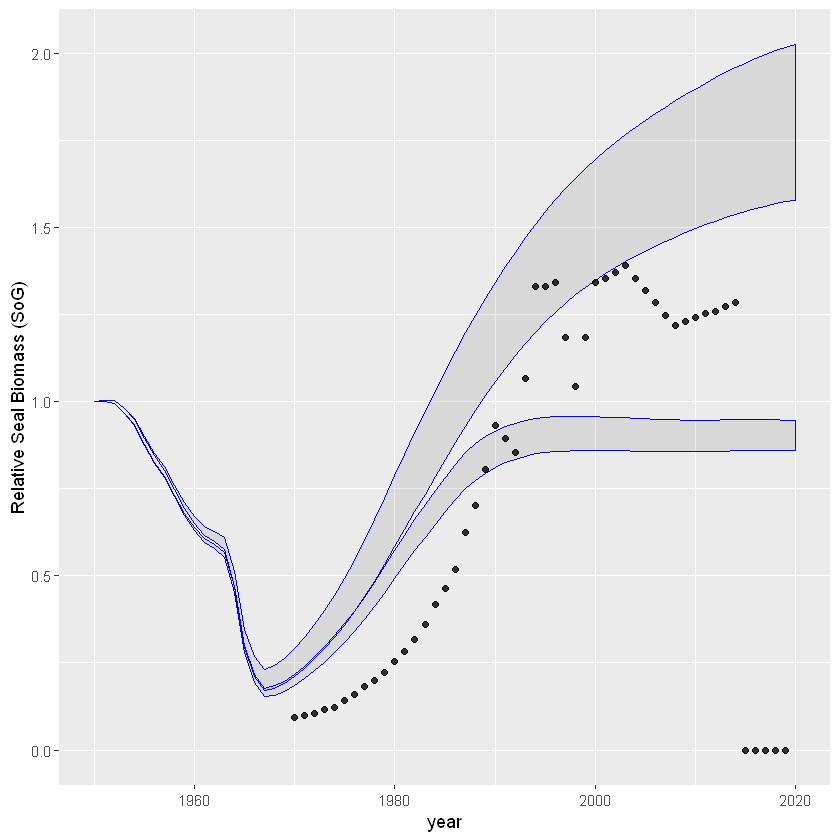

In [54]:
ggplot(data = results_trim2, aes(x = year, y = mean_yr)) +
    geom_ribbon(aes(ymin=mean_lwrB, ymax=mean_uppB),alpha = 0.1, color = "blue") +
    geom_ribbon(data = results_trim_TKWmid, aes(y=mean_yr, ymin=mean_lwrB, ymax=mean_uppB),alpha = 0.1, color = "blue") +
    geom_point(data = SealsObsRelB_1970on, aes(y=SealsObsRelB, x=year),alpha = 0.8, color = "black") + 
    ylab("Relative Seal Biomass (SoG)")

In [56]:
# temporary
# read seal time series data
# convert from abs to rel to match MC out
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//results//"
file = "biomass_annual_justresultsnoMC_scen1scen2b.csv"
header_lines = 0
roughrundata_df <- read.csv(paste(path, file,sep=""), skip = header_lines)


head(roughrundata_df)



year,seals_sc1,seals_sc1_up,seals_sc1_lo,seals_sc2b,seals_sc2b_up,seals_sc2b_lo
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950,0.1698849,0.2208504,0.1359079,0.1698851,0.2208506,0.1359081
1951,0.1697782,0.2207117,0.1358226,0.1697793,0.2207131,0.1358234
1952,0.1666590,0.2166567,0.1333272,0.1666638,0.2166629,0.1333310
1953,0.1612633,0.2096423,0.1290106,0.1612942,0.2096825,0.1290354
1954,0.1530211,0.1989274,0.1224169,0.1531146,0.1990490,0.1224917
1955,0.1429197,0.1857956,0.1143358,0.1431347,0.1860751,0.1145078


Warning message:
"Ignoring unknown aesthetics: y"

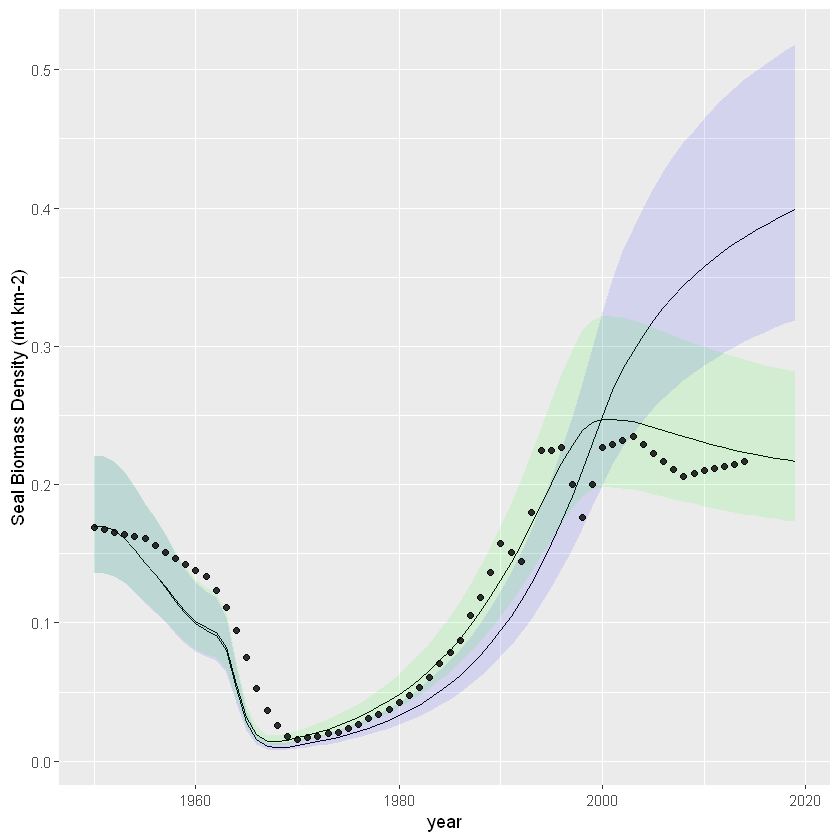

In [78]:
ggplot(data = roughrundata_df, aes(x = year, y = seals_sc1)) +
    geom_line() +
    geom_ribbon(aes(ymin=seals_sc1_lo, ymax=seals_sc1_up),alpha = 0.1, fill = "blue") +
    geom_line(aes(y=seals_sc2b)) +
    geom_ribbon(aes(y=seals_sc2b, ymin=seals_sc2b_lo, ymax=seals_sc2b_up),alpha = 0.1, fill = "green") +
    geom_point(data = seals_obs_relB_norecent, aes(y=SealsObsRelB_mt, x=year),alpha = 0.8, color = "black") + 
    ylab("Seal Biomass Density (mt km-2)") 

In [60]:
seals_obs_relB$SealsObsRelB_mt = seals_obs_relB$SealsObsRelB * 0.169

In [77]:
seals_obs_relB_norecent = seals_obs_relB %>% filter(seals_obs_relB < 2015)